In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from os.path import join
from os import listdir

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1', na_values = 'missing')

In [3]:
df_paris = df[df.Branch == "Disneyland_Paris"]
df_paris.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris
29030,670535589,5,NaN,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris


In [4]:
df_paris.Review_ID.value_counts().head(5)

226905150    2
549226495    1
172614697    1
160570438    1
441622909    1
Name: Review_ID, dtype: int64

In [5]:
df_paris[df_paris.Review_ID == 226905150]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
37605,226905150,5,2014-5,United States,Disneyland Paris is different then other Disne...,Disneyland_Paris
37606,226905150,5,2014-5,United States,Disneyland Paris is different then other Disne...,Disneyland_Paris


In [6]:
df_paris.drop_duplicates(subset='Review_ID', inplace=True, keep='first')

In [7]:
y=df_paris[df_paris.Year_Month.isnull()]
x=df_paris.dropna()
a=["Rating"]
for i in a:
  t, p_twosided = stats.ttest_ind(x[i], y[i], equal_var=False)
  print( "column is : ",i,", t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
  if p_twosided<0.05:
    print("significant") 

column is :  Rating , t =  6.65340851422237 , p_twosided =  4.604068922562037e-11 , p_onesided = 2.3020344612810185e-11
significant


In [8]:
x.describe()

,Review_ID,Rating
count,1.269300e+04,12693.000000
mean,3.381085e+08,3.980462
std,1.645176e+08,1.193108
min,9.182742e+07,1.000000
25%,1.874434e+08,3.000000
50%,3.073337e+08,4.000000
75%,4.758548e+08,5.000000
max,6.707220e+08,5.000000


In [9]:
y.describe()

,Review_ID,Rating
count,9.360000e+02,936.000000
mean,1.109078e+08,3.682692
std,1.064216e+08,1.330337
min,1.536786e+06,1.000000
25%,2.116090e+07,3.000000
50%,7.770543e+07,4.000000
75%,2.003285e+08,5.000000
max,6.705356e+08,5.000000


In [10]:
df_paris['Year_Month_m'] =  df['Year_Month'].isnull().astype(int) 
df_paris.head(500)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year_Month_m
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,0
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris,0
29030,670535589,5,NaN,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,1
...,...,...,...,...,...,...,...
29521,634040906,5,2018-11,United States,I grew up going to Disney in Florida and Calif...,Disneyland_Paris,0
29522,633958264,5,2018-11,United Kingdom,Visited here for 4 days. 6 adults and 4 childr...,Disneyland_Paris,0
29523,633926810,5,2018-10,United Kingdom,Highly Recommended for Family and Group Visito...,Disneyland_Paris,0
29524,633903327,2,2018-11,Czechia,We went to Disneyland specifically on friday i...,Disneyland_Paris,0


In [11]:
DepT_table = pd.crosstab(index=df_paris['Reviewer_Location'],columns=df_paris["Year_Month_m"])
test_stat,p,ddof,expected = stats.chi2_contingency(DepT_table, )
msg = "\nDeg. of freedom: {}\nTest Statistic : {}\np-value        : {}"
print( msg.format(ddof, test_stat, p))


Deg. of freedom: 132
Test Statistic : 132.83743086531334
p-value        : 0.4631680896256036


In [12]:

new = df_paris["Year_Month"].str.split("-", n = 1, expand = True)
df_paris["year"]= new[0]
df_paris["month"]= new[1]
df_paris.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year_Month_m,year,month
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,2019,3
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,0,2018,6
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,2019,4
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris,0,2019,4
29030,670535589,5,NaN,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,1,NaN,NaN


In [13]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 29026 to 42655
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          13629 non-null  int64 
 1   Rating             13629 non-null  int64 
 2   Year_Month         12693 non-null  object
 3   Reviewer_Location  13629 non-null  object
 4   Review_Text        13629 non-null  object
 5   Branch             13629 non-null  object
 6   Year_Month_m       13629 non-null  int64 
 7   year               12693 non-null  object
 8   month              12693 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


In [14]:
df_paris['year']=pd.to_numeric(df_paris.year, errors='coerce')
df_paris['month']=pd.to_numeric(df_paris.month, errors='coerce')
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13629 entries, 29026 to 42655
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Review_ID          13629 non-null  int64  
 1   Rating             13629 non-null  int64  
 2   Year_Month         12693 non-null  object 
 3   Reviewer_Location  13629 non-null  object 
 4   Review_Text        13629 non-null  object 
 5   Branch             13629 non-null  object 
 6   Year_Month_m       13629 non-null  int64  
 7   year               12693 non-null  float64
 8   month              12693 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [15]:
df_paris_year=df_paris.dropna()

In [16]:
bins = [0, 2, 3, 5]
groups = ['negative', 'neutral', 'good']
df_paris['Rating_cat'] = pd.cut(df_paris['Rating'], bins, labels=groups, include_lowest=True)

year
2010.0      40
2011.0     609
2012.0    1316
2013.0    1506
2014.0    1633
2015.0    2164
2016.0    1954
2017.0    1736
2018.0    1479
2019.0     256
dtype: int64


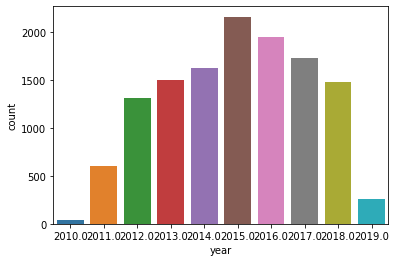

In [17]:
sns.countplot(df_paris['year'],label="Number of Reviews for year"); # Frequency of churn
print(df_paris.groupby('year').size())

In [18]:
df_paris = df_paris[(df_paris['year']>=2012 ) & (df_paris['year']<=2018)]

Rating
1     656
2     862
3    1805
4    3057
5    5408
dtype: int64


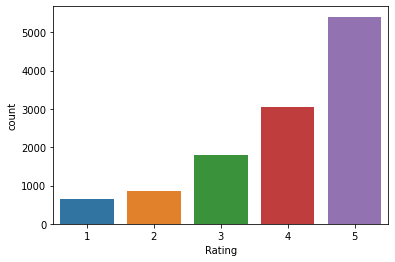

In [19]:
sns.countplot(df_paris['Rating'],label="Count"); # Frequency of churn
print(df_paris.groupby('Rating').size())

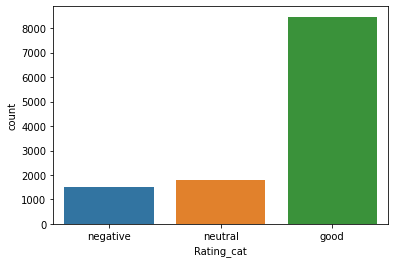

In [20]:
sns.countplot(df_paris['Rating_cat'],label="Count"); 
sns.countplot(df_paris['Rating_cat'],label="Count");

month
1.0      513
2.0      769
3.0      823
4.0     1045
5.0     1050
6.0     1124
7.0     1273
8.0     1612
9.0      906
10.0    1054
11.0     640
12.0     979
dtype: int64


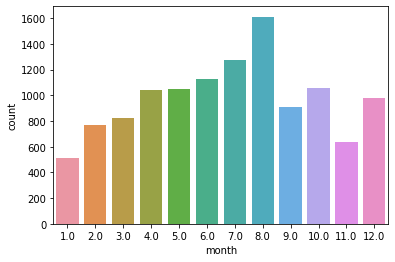

In [21]:
sns.countplot(df_paris['month'],label="Count"); # Frequency of churn
print(df_paris.groupby('month').size())

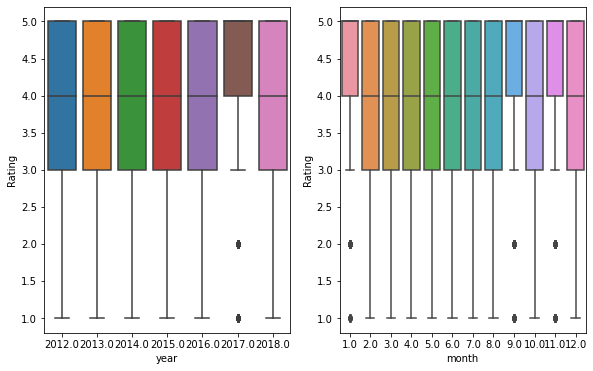

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x='year', y='Rating', data=df_paris)
plt.subplot(1,3,2)
sns.boxplot(x='month', y='Rating', data=df_paris)



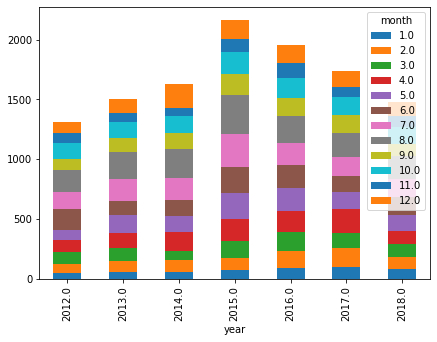

In [23]:
IntlPlan_table = pd.crosstab(index=df_paris['year'],columns=df_paris['month'])
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5))


Deg. of freedom: 44
Test Statistic : 147.48880664835337
p-value        : 4.2621018281187973e-13


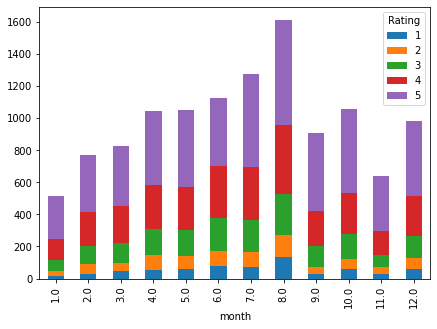

In [24]:
IntlPlan_table = pd.crosstab(index=df_paris['month'],columns=df_paris['Rating'])
IntlPlan_table
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5))
test_stat,p,ddof,expected = stats.chi2_contingency(IntlPlan_table, )
msg = "\nDeg. of freedom: {}\nTest Statistic : {}\np-value        : {}"
print( msg.format(ddof, test_stat, p))
if p>0.05:
  print(significant)

In [25]:
IntlPlan_table = pd.crosstab(index=df_paris['month'],columns=df_paris['year'])
print(IntlPlan_table)
test_stat,p,ddof,expected = stats.chi2_contingency(IntlPlan_table, )
msg = "\nDeg. of freedom: {}\nTest Statistic : {}\np-value        : {}"
print( msg.format(ddof, test_stat, p))
if p>0.05:
  print(significant)

year   2012.0  2013.0  2014.0  2015.0  2016.0  2017.0  2018.0
month                                                        
1.0        51      54      62      71      94     102      79
2.0        75      92      95     105     141     156     105
3.0       101     113      80     139     154     129     107
4.0        95     122     152     186     181     196     113
5.0        88     150     136     215     187     143     131
6.0       178     118     135     216     192     135     150
7.0       142     183     180     278     186     155     149
8.0       181     229     244     331     228     204     195
9.0        90     115     133     171     149     151      97
10.0      136     132     141     184     164     152     145
11.0       80      75      72     110     130      81      92
12.0       99     123     203     158     148     132     116

Deg. of freedom: 66
Test Statistic : 245.16854779726467
p-value        : 2.0035783644897883e-22


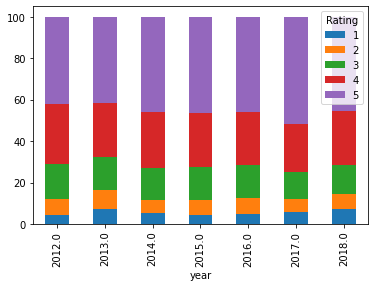

In [26]:
((df_paris.groupby(["year","Rating"])["year"].count() / df_paris.groupby(["year","Rating"])["year"].count().groupby("year").sum()).unstack("Rating")*100).plot(kind="bar",stacked=True)

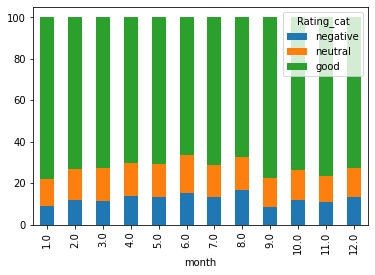

In [27]:
((df_paris.groupby(["month","Rating_cat"])["month"].count() / df_paris.groupby(["month","Rating_cat"])["month"].count().groupby("month").sum()).unstack("Rating_cat")*100).plot(kind="bar",stacked=True)

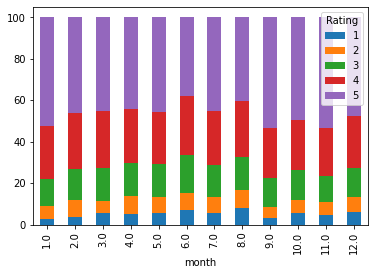

In [28]:
((df_paris.groupby(["month","Rating"])["month"].count() / df_paris.groupby(["month","Rating"])["month"].count().groupby("month").sum()).unstack("Rating")*100).plot(kind="bar",stacked=True)

In [29]:
label_names=df_paris.Reviewer_Location.value_counts().sort_index().index
size = df_paris.Reviewer_Location.value_counts().sort_index().tolist()
big_countries=[]
for i,z in zip(size,label_names):
  if int(i)>50:
   print(z,i)
   big_countries.append(z)

Australia 510
Belgium 110
Canada 156
France 169
Germany 113
Greece 72
India 271
Ireland 368
Israel 61
Italy 70
Malta 69
Netherlands 160
New Zealand 54
Portugal 77
Romania 74
Saudi Arabia 51
Singapore 83
South Africa 75
Spain 86
Switzerland 73
United Arab Emirates 98
United Kingdom 6942
United States 1091


In [30]:
df_big= df_paris[df_paris['Reviewer_Location'].isin(big_countries)]
df_big.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year_Month_m,year,month,Rating_cat
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,0,2018.0,6.0,good
29050,668381069,5,2018-12,Israel,we have traveled during December. the day was ...,Disneyland_Paris,0,2018.0,12.0,good
29054,668175833,5,2018-5,United States,We had the privilege of visiting Disneyland Pa...,Disneyland_Paris,0,2018.0,5.0,good
29079,667072412,3,2018-9,Australia,First time we came was a part of our honeymoon...,Disneyland_Paris,0,2018.0,9.0,neutral
29086,666388777,4,2018-7,Italy,We visited in RV autocamper and found great ...,Disneyland_Paris,0,2018.0,7.0,good


In [31]:
label_names=df_paris.Reviewer_Location.value_counts().sort_index().index
size = df_paris.Reviewer_Location.value_counts().sort_index().tolist()
big_countries=[]
for i,z in zip(size,label_names):
  if int(i)>30:
   print(z,i)
   big_countries.append(z)

Australia 510
Belgium 110
Brazil 32
Canada 156
Cyprus 36
Denmark 47
Egypt 42
France 169
Germany 113
Greece 72
India 271
Indonesia 34
Ireland 368
Israel 61
Italy 70
Lebanon 47
Malaysia 42
Malta 69
Netherlands 160
New Zealand 54
Norway 50
Portugal 77
Romania 74
Saudi Arabia 51
Singapore 83
South Africa 75
Spain 86
Sweden 45
Switzerland 73
Turkey 33
United Arab Emirates 98
United Kingdom 6942
United States 1091


group1,group2,meandiff,p-adj,lower,upper,reject
Australia,Belgium,0.0763,0.9,-0.3918,0.5444,False
Australia,Brazil,0.5365,0.7732,-0.2749,1.348,False
Australia,Canada,-0.1446,0.9,-0.552,0.2628,False
Australia,Cyprus,0.6268,0.3532,-0.1411,1.3947,False
Australia,Denmark,-0.034,0.9,-0.7127,0.6448,False
Australia,Egypt,0.6824,0.0875,-0.0325,1.3972,False
Australia,France,-0.1184,0.9,-0.5137,0.2768,False
Australia,Germany,0.234,0.9,-0.229,0.6969,False
Australia,Greece,0.6129,0.0135,0.0523,1.1735,True
Australia,India,0.5778,0.001,0.2431,0.9125,True


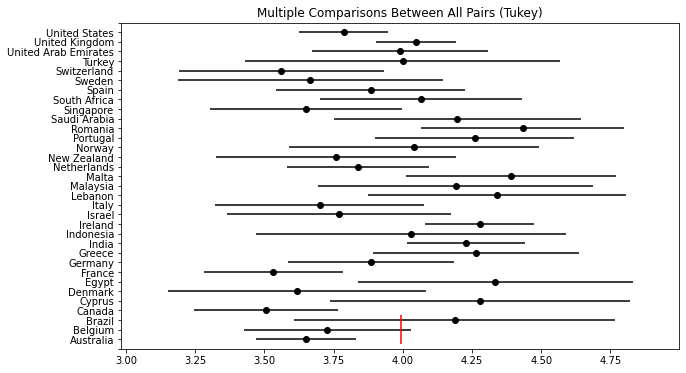

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_big= df_paris[df_paris['Reviewer_Location'].isin(big_countries)]
df_big.head(5)

tukey = pairwise_tukeyhsd(endog=df_big.Rating,     # Data
                          groups=df_big.Reviewer_Location,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary

In [33]:
label_names=df_paris.Reviewer_Location.value_counts().sort_index().index
size = df_paris.Reviewer_Location.value_counts().sort_index().tolist()
big_countries=[]
for i,z in zip(size,label_names):
  if int(i)>50:
   print(z,i)
   big_countries.append(z)

Australia 510
Belgium 110
Canada 156
France 169
Germany 113
Greece 72
India 271
Ireland 368
Israel 61
Italy 70
Malta 69
Netherlands 160
New Zealand 54
Portugal 77
Romania 74
Saudi Arabia 51
Singapore 83
South Africa 75
Spain 86
Switzerland 73
United Arab Emirates 98
United Kingdom 6942
United States 1091


In [34]:
df_big= df_paris[df_paris['Reviewer_Location'].isin(big_countries)]
import plotly.express as px
import numpy as np
fig = px.treemap(df_big, path=['Reviewer_Location'],
                  color_continuous_scale='RdBu',
                  color='Rating')
fig.show()

group1,group2,meandiff,p-adj,lower,upper,reject
Australia,Belgium,0.0763,0.9,-0.3704,0.5229,False
Australia,Canada,-0.1446,0.9,-0.5333,0.2442,False
Australia,France,-0.1184,0.9,-0.4955,0.2587,False
Australia,Germany,0.234,0.9,-0.2078,0.6757,False
Australia,Greece,0.6129,0.0071,0.078,1.1478,True
Australia,India,0.5778,0.001,0.2584,0.8972,True
Australia,Ireland,0.6262,0.001,0.3356,0.9168,True
Australia,Israel,0.1195,0.9,-0.4561,0.6951,False
Australia,Italy,0.049,0.9,-0.4925,0.5906,False
Australia,Malta,0.7403,0.001,0.1953,1.2853,True


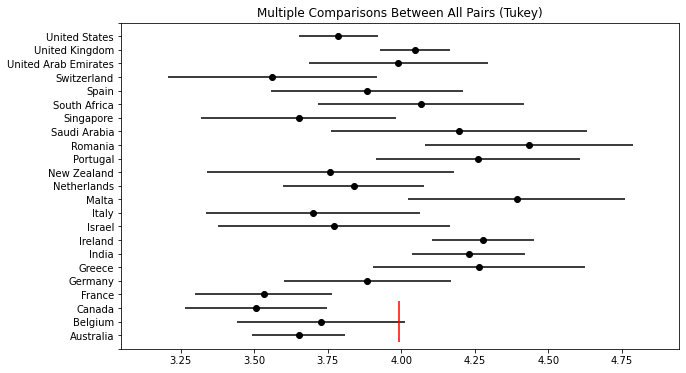

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df_big.Rating,     # Data
                          groups=df_big.Reviewer_Location,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()    

group1,group2,meandiff,p-adj,lower,upper,reject
2012.0,2013.0,-0.1114,0.1615,-0.2432,0.0203,False
2012.0,2014.0,0.0517,0.9,-0.0777,0.181,False
2012.0,2015.0,0.0632,0.7019,-0.0589,0.1852,False
2012.0,2016.0,0.0317,0.9,-0.0928,0.1561,False
2012.0,2017.0,0.1191,0.0862,-0.0085,0.2467,False
2012.0,2018.0,-0.0174,0.9,-0.1497,0.1149,False
2013.0,2014.0,0.1631,0.0022,0.0383,0.2878,True
2013.0,2015.0,0.1746,0.001,0.0574,0.2917,True
2013.0,2016.0,0.1431,0.0078,0.0234,0.2628,True
2013.0,2017.0,0.2305,0.001,0.1076,0.3534,True


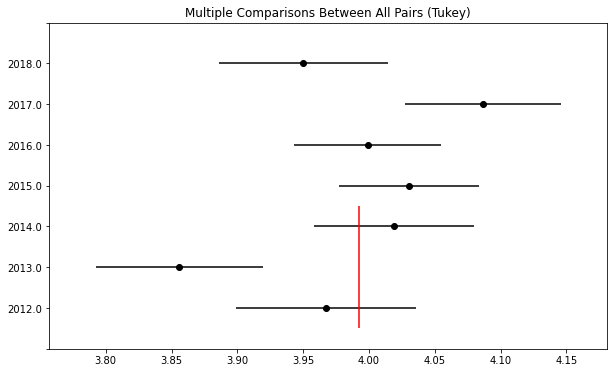

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df_paris.Rating,     # Data
                          groups=df_paris.year,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-0.1494,0.5296,-0.3694,0.0705,False
1.0,3.0,-0.1762,0.2501,-0.3933,0.0409,False
1.0,4.0,-0.2283,0.0175,-0.4363,-0.0203,True
1.0,5.0,-0.2128,0.0392,-0.4207,-0.005,True
1.0,6.0,-0.3624,0.001,-0.568,-0.1568,True
1.0,7.0,-0.2068,0.0389,-0.4086,-0.005,True
1.0,8.0,-0.3584,0.001,-0.5539,-0.1628,True
1.0,9.0,0.0082,0.9,-0.205,0.2214,False
1.0,10.0,-0.1283,0.6561,-0.336,0.0794,False
1.0,11.0,-0.0403,0.9,-0.2689,0.1884,False


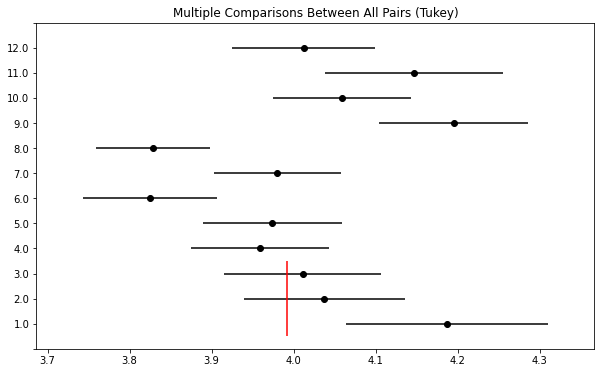

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df_paris.Rating,     # Data
                          groups=df_paris.month,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary

In [38]:
bins = [0, 2, 5, 8,11,12]
groups = ['winter', 'spring ', 'summer',"autumn",'winter' ]
df_paris['month_cat'] = pd.cut(df_paris['month'], bins, labels=groups, include_lowest=True,ordered=False)

group1,group2,meandiff,p-adj,lower,upper,reject
autumn,spring,-0.149,0.001,-0.2309,-0.0671,True
autumn,summer,-0.2523,0.001,-0.3287,-0.1759,True
autumn,winter,-0.0675,0.1932,-0.1548,0.0198,False
spring,summer,-0.1033,0.0019,-0.1772,-0.0294,True
spring,winter,0.0815,0.0662,-0.0036,0.1666,False
summer,winter,0.1848,0.001,0.105,0.2647,True


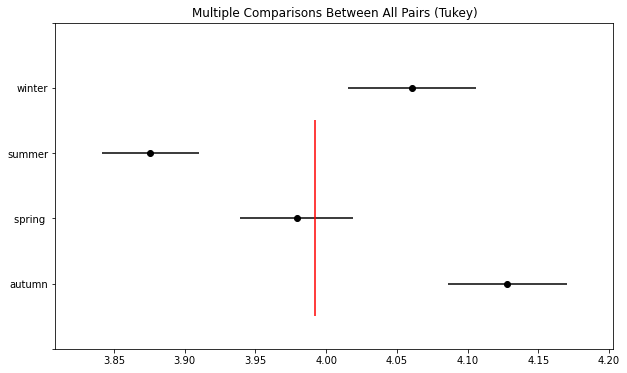

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df_paris.Rating,     # Data
                          groups=df_paris.month_cat,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary

month_cat
autumn     2600
spring     2918
summer     4009
winter     2261
dtype: int64


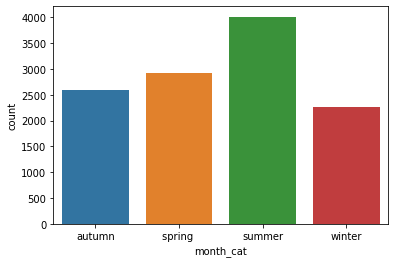

In [40]:
sns.countplot(df_paris['month_cat'],label="Count"); # Frequency of churn
print(df_paris.groupby('month_cat').size())

group1,group2,meandiff,p-adj,lower,upper,reject
201201.0,201202.0,-0.131,0.9,-1.0318,0.7699,False
201201.0,201203.0,-0.0681,0.9,-0.9208,0.7845,False
201201.0,201204.0,0.0929,0.9,-0.7687,0.9545,False
201201.0,201205.0,-0.0836,0.9,-0.957,0.7899,False
201201.0,201206.0,-0.1963,0.9,-0.9846,0.592,False
201201.0,201207.0,-0.2233,0.9,-1.0335,0.587,False
201201.0,201208.0,-0.6757,0.3212,-1.4625,0.1112,False
201201.0,201209.0,0.0824,0.9,-0.7876,0.9523,False
201201.0,201210.0,0.0294,0.9,-0.7856,0.8444,False
201201.0,201211.0,-0.1801,0.9,-1.0695,0.7092,False


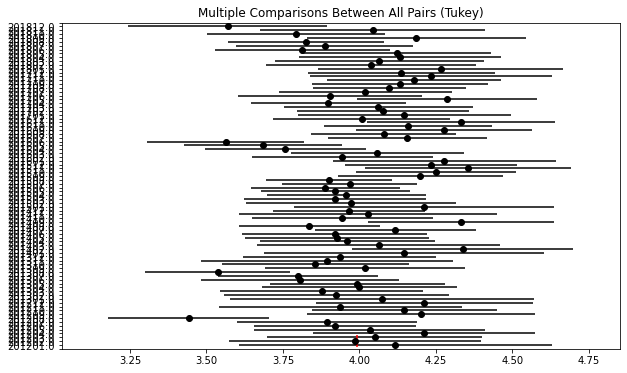

In [41]:
df_paris['year_month']=df_paris['year']*100+df_paris['month']
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df_paris.Rating,     # Data
                          groups=df_paris.year_month,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary


In [42]:
neg_reviews = df_paris.loc[df_paris["Rating_cat"] == "negative", "Review_Text"]
neg_reviews=neg_reviews.tolist()
neg_reviews_sums=neg_reviews[ :25]

In [43]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [44]:



cachedStopWords = stopwords.words("english")


In [45]:
counts = {}

for line in neg_reviews_sums:
  words=line.split(" ")
  for items in words:
    items = items.strip("!.,;:?#")
    items=items.split(",")
    for token in items:
     token=token.split(".")
     for ina in token:
       ina=ina.split(";")
       for sa in ina:
        sa=sa.split("!")
        for da in sa:
         da=da.split("?")  
         for word in da:
          word = word.lower()
          if len(word) >= 3 and word not in cachedStopWords and "disney" not in word:
           if word not in counts:
            counts[word] = 1
           else:
            counts[word] +=1
sum_dict=0
max_counts = {}
for i in range(150):
  maxValue = max(counts.values())
  for k, v in counts.items():
    if v == maxValue:
      maxKey = k
      sum_dict=sum_dict+v
      max_counts[k] = v
      break
  print(maxKey, "->", maxValue)
  counts.pop(maxKey)
print(sum_dict)


park -> 33
get -> 30
rides -> 27
food -> 22
would -> 18
money -> 18
people -> 17
day -> 17
like -> 15
place -> 14
paris -> 14
one -> 14
wait -> 12
really -> 12
much -> 12
children -> 11
staff -> 11
went -> 11
told -> 11
minutes -> 11
eat -> 10
also -> 10
closed -> 9
many -> 9
ride -> 9
line -> 9
back -> 9
cold -> 9
poor -> 9
see -> 8
christmas -> 8
could -> 8
restaurants -> 8
pay -> 8
parks -> 8
around -> 8
walk -> 8
kids -> 8
waited -> 8
need -> 8
least -> 8
mins -> 8
experience -> 8
even -> 7
room -> 7
etc -> 7
time -> 7
queues -> 7
everything -> 7
wanted -> 7
times -> 7
florida -> 7
find -> 7
hours -> 7
well -> 7
visit -> 7
good -> 7
hot -> 7
small -> 6
old -> 6
booked -> 6
days -> 6
meal -> 6
love -> 6
waiting -> 6
whole -> 6
show -> 6
long -> 6
characters -> 6
character -> 6
got -> 6
restaurant -> 6
take -> 6
another -> 6
queue -> 6
know -> 6
fast -> 6
hotel -> 6
great -> 6
service -> 6
queuing -> 6
little -> 5
way -> 5
move -> 5
thought -> 5
magical -> 5
asked -> 5
put -> 5
hour 

In [46]:
 for k, v in max_counts.items():
   print(k,v)

park 33
get 30
rides 27
food 22
would 18
money 18
people 17
day 17
like 15
place 14
paris 14
one 14
wait 12
really 12
much 12
children 11
staff 11
went 11
told 11
minutes 11
eat 10
also 10
closed 9
many 9
ride 9
line 9
back 9
cold 9
poor 9
see 8
christmas 8
could 8
restaurants 8
pay 8
parks 8
around 8
walk 8
kids 8
waited 8
need 8
least 8
mins 8
experience 8
even 7
room 7
etc 7
time 7
queues 7
everything 7
wanted 7
times 7
florida 7
find 7
hours 7
well 7
visit 7
good 7
hot 7
small 6
old 6
booked 6
days 6
meal 6
love 6
waiting 6
whole 6
show 6
long 6
characters 6
character 6
got 6
restaurant 6
take 6
another 6
queue 6
know 6
fast 6
hotel 6
great 6
service 6
queuing 6
little 5
way 5
move 5
thought 5
magical 5
asked 5
put 5
hour 5
popcorn 5
bad 5
think 5
person 5
rather 5
mail 5
sent 5
still 5
shops 5
everywhere 5
took 5
cost 5
unless 5
fun 4
front 4
year 4
trying 4
family 4
visited 4
princesses 4
expensive 4
first 4
feel 4
price 4
huge 4
lines 4
tickets 4
empty 4
someone 4
seating 4
stan

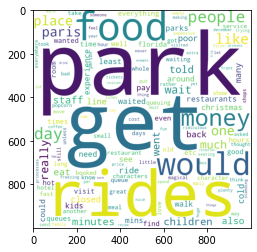

In [47]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=150,relative_scaling=1).generate_from_frequencies(max_counts)
plt.imshow(wc)

## FREQUENT WORDS

We  can see from data following issues are main reasons for negative reviews:

*PARKING

*FOOD

*MONEY

*WAITING(TOO MANY TİME RELATED ISSUES AND  WORDS(LİNES,QUEUES))

*SERVICE AND STAFF

*WEATHER (COLD WEATHER MOSTLY DECEMBER CHRİSTMAS RELATED)

*WALKING

*CHRISTMAS

group1,group2,meandiff,p-adj,lower,upper,reject
Africa,Asia,-0.0972,0.9,-0.3774,0.183,False
Africa,Europe,-0.1618,0.4721,-0.4193,0.0956,False
Africa,North America,-0.4368,0.001,-0.7085,-0.165,True
Africa,Oceana,-0.5352,0.001,-0.8268,-0.2437,True
Africa,South America,-0.2471,0.7111,-0.757,0.2627,False
Asia,Europe,-0.0646,0.6347,-0.1864,0.0571,False
Asia,North America,-0.3396,0.001,-0.4893,-0.1899,True
Asia,Oceana,-0.438,0.001,-0.6212,-0.2548,True
Asia,South America,-0.1499,0.9,-0.6065,0.3067,False
Europe,North America,-0.2749,0.001,-0.3756,-0.1743,True


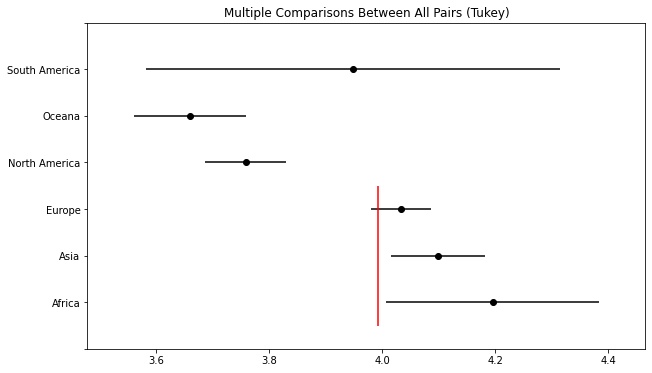

In [48]:

df =pd.read_excel('continents.xlsx')
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df.Rating,     # Data
                          groups=df.continent,   # Groups
                          alpha=0.05)      # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=df_paris["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red")
tukey.summary()              # See test summary

continent
Africa            174
Asia              835
Europe           8880
North America    1276
Oceana            565
South America      58
dtype: int64


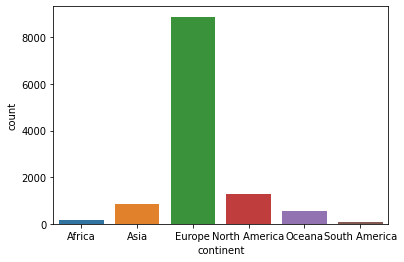

In [49]:
sns.countplot(df['continent'],label="Count"); # Frequency of churn
print(df.groupby('continent').size())

In [50]:
df = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1', na_values = 'missing')
df.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
new = df["Year_Month"].str.split("-", n = 1, expand = True)
df["year"]= new[0]
df["month"]= new[1]
df['year']=pd.to_numeric(df.year, errors='coerce')
df['month']=pd.to_numeric(df.month, errors='coerce')
df['Year_Month_m'] =  df['Year_Month'].isnull().astype(int) 
bins = [0, 2, 3, 5]
groups = ['negative', 'neutral', 'good']
df['Rating_cat'] = pd.cut(df['Rating'], bins, labels=groups, include_lowest=True)
df = df[(df['year']>=2012 ) & (df['year']<=2018)]
bins = [0, 2, 5, 8,11,12]
groups_m = ['winter', 'spring ', 'summer',"autumn",'winter' ]
df['month_cat'] = pd.cut(df['month'], bins, labels=groups_m, include_lowest=True,ordered=False)

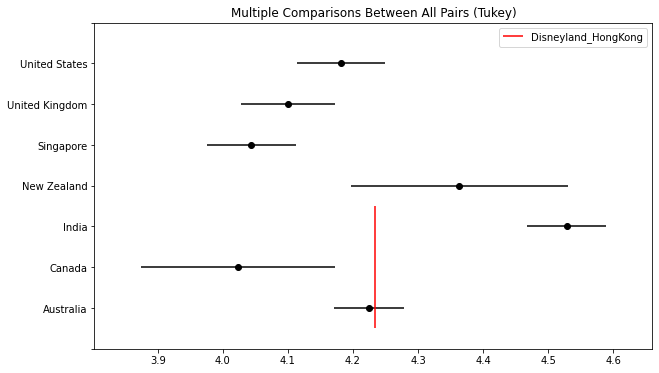

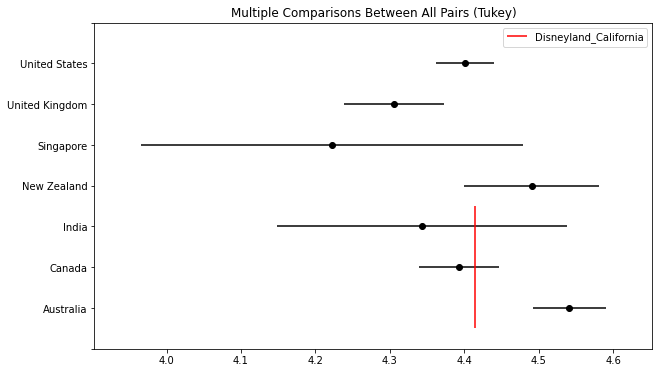

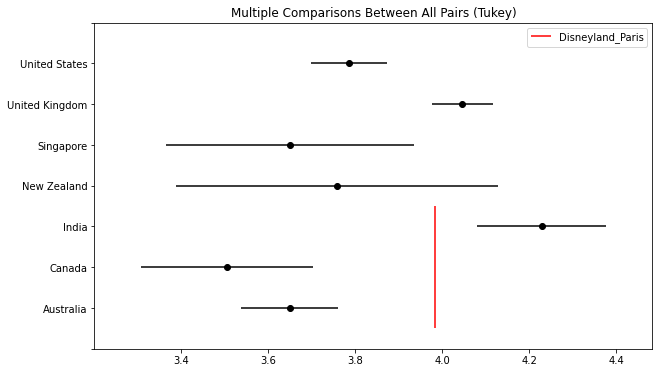

In [51]:
counts = {}
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for i in df.Branch.unique():  
 df_n = df[df.Branch == i]
 label_names=df_n.Reviewer_Location.value_counts().sort_index().index
 size = df_n.Reviewer_Location.value_counts().sort_index().tolist()
 big_countries=[]
 for i,z in zip(size,label_names):
  if int(i)>50:
   if z not in counts:
    counts[z] = 1
   else:
    counts[z] +=1

big_countries=[]
for k, v in counts.items():
    if v == 3:
     big_countries.append(k)


df_big= df[df['Reviewer_Location'].isin(big_countries)]

for i in df_big.Branch.unique():  
 df_new = df_big[df_big.Branch == i]
 tukey = pairwise_tukeyhsd(endog=df_new.Rating,     # Data
                          groups=df_new.Reviewer_Location,   # Groups
                          alpha=0.05)      # Significance level

 tukey.plot_simultaneous()    # Plot group confidence intervals
 plt.vlines(x=df_new["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red",label=i)
 plt.legend()
 tukey.summary()    

In [52]:
df.pivot_table(index='month_cat', columns='Branch', values='Rating')

Branch,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
month_cat,,,
autumn,4.433726,4.252686,4.128077
spring,4.378487,4.267554,3.979095
summer,4.449838,4.114861,3.875779
winter,4.363867,4.247437,4.060593


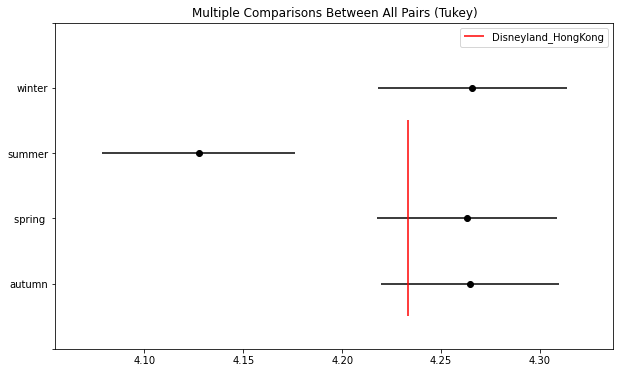

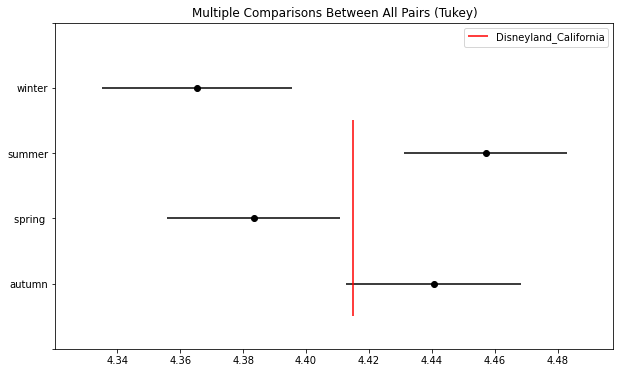

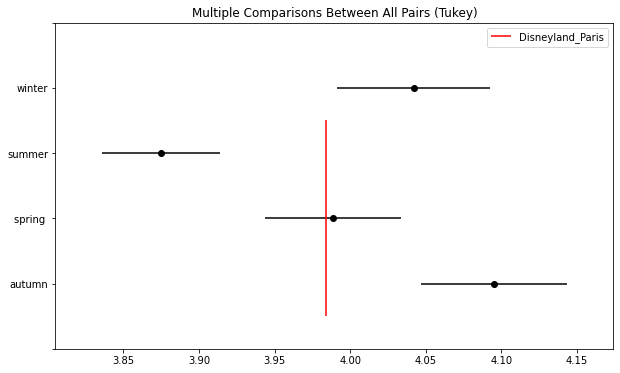

In [53]:
for i in df.Branch.unique():  
 df_new = df_big[df_big.Branch == i]
 tukey = pairwise_tukeyhsd(endog=df_new.Rating,     # Data
                          groups=df_new.month_cat,   # Groups
                          alpha=0.05)      # Significance level

 tukey.plot_simultaneous()    # Plot group confidence intervals
 plt.vlines(x=df_new["Rating"].mean(),ymin=-0.5,ymax=2.5, color="red",label=i)
 plt.legend()
 tukey.summary()    

In [54]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [55]:
df_big.pivot_table(index='month_cat', columns='Branch', values='Rating')

Branch,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
month_cat,,,
autumn,4.440597,4.264615,4.095310
spring,4.383342,4.263240,3.988485
summer,4.457093,4.127371,3.874918
winter,4.365282,4.265921,4.042129


In [56]:
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=['Branch', 'month_cat'],
                  color='Rating',color_continuous_scale='RdBu',
                  )
fig.show()

In [57]:
fig = px.treemap(df_paris, path=['Branch', 'month_cat',"month"],color_continuous_scale='RdBu',
                  color='Rating')
fig.show()

In [58]:
fig = px.treemap(df_big, path=["Reviewer_Location",'Branch'],color_continuous_scale='RdBu',
                  color='Rating')
fig.show()

In [59]:
fig = px.treemap(df, path=['Branch', 'month_cat',"month"],
                  color_continuous_scale='RdBu',
                  color='Rating')
fig.show()

In [60]:
fig = px.treemap(df_big, path=["Reviewer_Location",'Branch',"month_cat"],color_continuous_scale='RdBu',
                  color='Rating')
fig.show()

In [61]:
fig = px.treemap(df_big, path=['Reviewer_Location'],
                  color_continuous_scale='RdBu',
                  color='Rating')
fig.show()